In [1]:
from queue import Queue

import matplotlib.pyplot as plt
import tracemalloc as tm
import numpy as np
import pandas as pd
import time
from threading import Thread

df = pd.concat(
    [pd.read_csv("40075data.csv"),
    pd.read_csv("51304data.csv"),
    pd.read_csv("61501data.csv"),
    pd.read_csv("66946data.csv"),
    pd.read_csv("94157data.csv"),
    pd.read_csv("99605data.csv")]
)

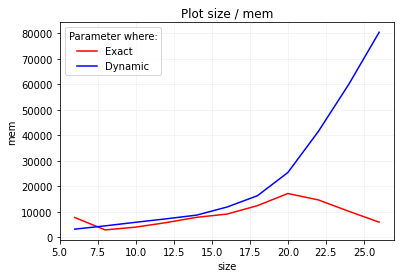

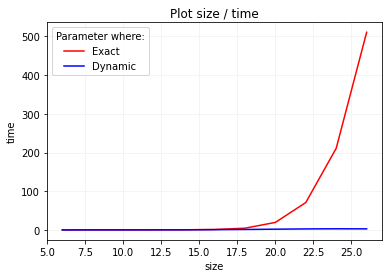

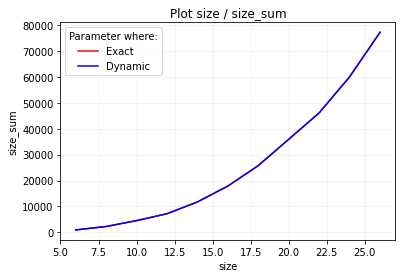

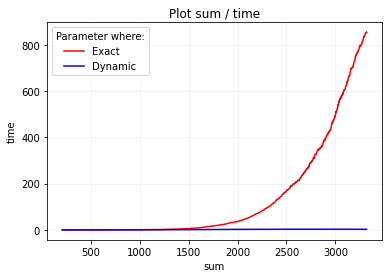

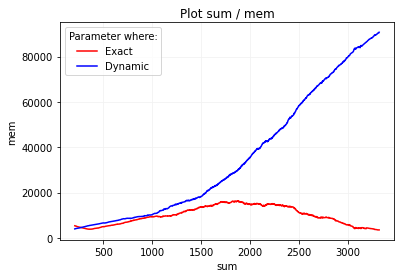

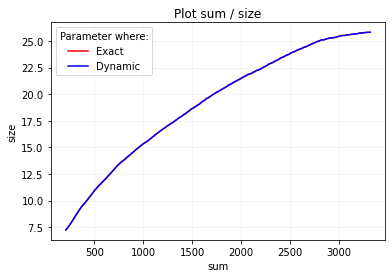

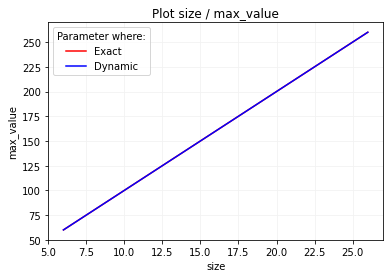

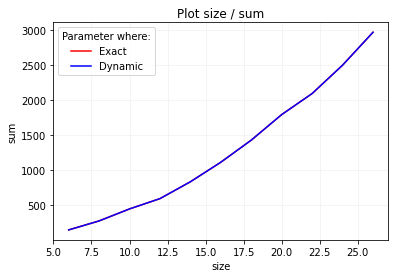

In [15]:

def plot_size_mem(dataframe):
    x_label="size"
    y_label="mem"
    plot_data_acc = dataframe[[x_label, y_label]]\
        .where(dataframe["algorithm"] == "accurate").groupby(x_label).mean()
    plot_data_dyn = dataframe[[x_label, y_label]]\
        .where(dataframe["algorithm"] == "dynamic").groupby(x_label).mean()
    plt.plot(
        plot_data_acc.index,
        plot_data_acc[y_label],
        "r-",
        label="Exact"
    )
    plt.plot(
        plot_data_dyn.index,
        plot_data_dyn[y_label],
        "b-",
        label="Dynamic"
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, color='0.95')
    plt.legend(title='Parameter where:')
    plt.title('Plot ' + x_label + ' / ' + y_label)
    plt.savefig('Plot_' + x_label + '-' + y_label + ".png")
    plt.show()

def gen_plot(x_label, y_label, dataframe, window_size=0):
    if window_size>0:
        plot_data_acc = dataframe[[x_label, y_label]].where(dataframe["algorithm"] == "accurate").groupby(
            x_label).mean() \
            .rolling(window=window_size,
                     center=True).mean()
        plot_data_dyn = dataframe[[x_label, y_label]].where(dataframe["algorithm"] == "dynamic").groupby(x_label).mean() \
            .rolling(window=window_size,
                     center=True).mean()
    else:
        plot_data_acc = dataframe[[x_label, y_label]].where(dataframe["algorithm"] == "accurate")\
            .groupby(x_label).mean()
        plot_data_dyn = dataframe[[x_label, y_label]].where(dataframe["algorithm"] == "dynamic").groupby(x_label).mean()
    plt.plot(
        plot_data_acc.index,
        plot_data_acc[y_label],
        "r-",
        label="Exact"
    )
    plt.plot(
        plot_data_dyn.index,
        plot_data_dyn[y_label],
        "b-",
        label="Dynamic"
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.grid(True, color='0.95')
    plt.legend(title='Parameter where:')
    plt.title('Plot ' + x_label + ' / ' + y_label)
    plt.savefig('Plot_' + x_label + '-' + y_label + ".png")
    plt.show()



def plot_size_size_sum(dataframe):
    x_label="size"
    y_label="size_sum"
    dataframe["size_sum"] = df.apply (lambda row: row['size']* row['sum'], axis=1)
    plot_data_acc = dataframe[[x_label, y_label]]\
        .where(dataframe["algorithm"] == "accurate").groupby(x_label).mean()
    plot_data_dyn = dataframe[[x_label, y_label]]\
        .where(dataframe["algorithm"] == "dynamic").groupby(x_label).mean()
    plt.plot(
        plot_data_acc.index,
        plot_data_acc[y_label],
        "r-",
        label="Exact"
    )
    plt.plot(
        plot_data_dyn.index,
        plot_data_dyn[y_label],
        "b-",
        label="Dynamic"
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, color='0.95')
    plt.legend(title='Parameter where:')
    plt.title('Plot ' + x_label + ' / ' + y_label)
    plt.savefig('Plot_' + x_label + '-' + y_label + ".png")
    plt.show()

plot_size_mem(df)
gen_plot("size","time",df)
plot_size_size_sum(df)

gen_plot("sum","time",df,300)
gen_plot("sum","mem",df,300)
gen_plot("sum","size",df,300)

gen_plot("size","max_value",df)
gen_plot("size","sum",df)